In [45]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview
from constants import target_name, x_path, y_path
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from libs.simple_processing import separate_target, split_train_test

X = pd.read_csv(x_path)
y = pd.read_csv(y_path)

print(X.head())
print(y.head())


   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0  0.090909    0.12500     0.067170  0.003108     0.0         0.0   0.0   
1  0.090909    0.28125     0.172075  0.004072     0.4         0.0   0.0   
2  0.060606    0.12500     0.036226  0.005743     0.0         0.0   0.0   
3  0.121212    0.37500     0.126038  0.002714     0.0         0.0   0.0   
4  0.090909    0.25000     0.104906  0.004579     0.0         0.0   0.0   

   condition     grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        0.5  0.500000    0.097588       0.000000  0.478261      0.000000   
1        0.5  0.500000    0.206140       0.082988  0.443478      0.988089   
2        0.5  0.416667    0.052632       0.000000  0.286957      0.000000   
3        1.0  0.500000    0.083333       0.188797  0.565217      0.000000   
4        0.5  0.583333    0.152412       0.000000  0.756522      0.000000   

    zipcode       lat      long  sqft_living15  sqft_lot15  
0  0.893939  0.571498  0.

In [64]:
from libs.simple_processing import separate_target, split_train_test

X_train, X_valid, y_train, y_valid = split_train_test(X, y, 0.7)

print("Done")

Done


In [65]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import activations
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

params = [
    {
        'model_data': {
            'model': Sequential(),
            'layer'
        },
        'hyperparams': {}
    }
]


# patience below 7 cuts to early
early_stopping = EarlyStopping(
    min_delta=0.001,  # minimium amount of change to count as an improvement
    patience=7,  # how many epochs to wait before stopping
    restore_best_weights=True
)

features_count = X_train.shape[1]

model = Sequential()
model.add(Dense(features_count, activation='relu', input_shape=[features_count]))
# model.add(Flatten())
model.add(Dense(features_count, activation='relu'))
model.add(Dense(features_count, activation='relu'))
model.add(Dense(features_count, activation='relu'))
model.add(Dense(features_count, activation='relu'))
model.add(Dense(features_count, activation='relu'))
model.add(Dense(1))

model.compile(
    optimizer='Adam'
    # ,loss='mes'
    # , loss='mae'
    # loss='mean_squared_error',
    , loss='mean_absolute_error'
    # , metrics=['accuracy']
    # , metrics=['binary_accuracy']
)

history = model.fit(x=X_train, y=y_train,
  validation_data=(X_valid,y_valid)
  , batch_size=128
  , epochs=400
  , callbacks=[early_stopping]
  , use_multiprocessing=True
  # , verbose='2'
)

history_df = pd.DataFrame(history.history)
print("Minimum Validation Loss: {:0.5f}".format(history_df['val_loss'].min()))
# print("Max Validation Accuracy: {:0.5f}".format(history_df['val_accuracy'].max()))
print(history_df)

Epoch 1/400


2022-12-06 10:23:26.142314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - ETA: 0s - loss: 544945.6875

2022-12-06 10:23:28.497674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


119/119 [==============================] - 3s 20ms/step - loss: 544945.6875 - val_loss: 528125.1250
Epoch 2/400
119/119 [==============================] - 2s 15ms/step - loss: 470998.4062 - val_loss: 198626.8906
Epoch 3/400
119/119 [==============================] - 3s 22ms/step - loss: 188113.7500 - val_loss: 177513.3750
Epoch 4/400
119/119 [==============================] - 2s 16ms/step - loss: 182141.3594 - val_loss: 172617.4062
Epoch 5/400
119/119 [==============================] - 2s 13ms/step - loss: 176683.3438 - val_loss: 166800.9531
Epoch 6/400
119/119 [==============================] - 2s 13ms/step - loss: 170813.4844 - val_loss: 160573.9219
Epoch 7/400
119/119 [==============================] - 2s 14ms/step - loss: 163763.2656 - val_loss: 153044.6562
Epoch 8/400
119/119 [==============================] - 2s 13ms/step - loss: 155309.2031 - val_loss: 144294.2656
Epoch 9/400
119/119 [==============================] - 1s 12ms/step - loss: 145551.7031 - val_loss: 134508.0312
Epoc

In [69]:
# Generate generalization metrics
score = model.evaluate(X_valid, y_valid, verbose=0)
print("Test Loss: {:0.5f}".format(score))


Test Loss: 92785.80469


136/136 [==============================] - 1s 6ms/step
MAE: 95460.99359530419
MSE: 25638951292.418617
RMSE: 160121.67652263268
VarScore: 0.7854949020565181


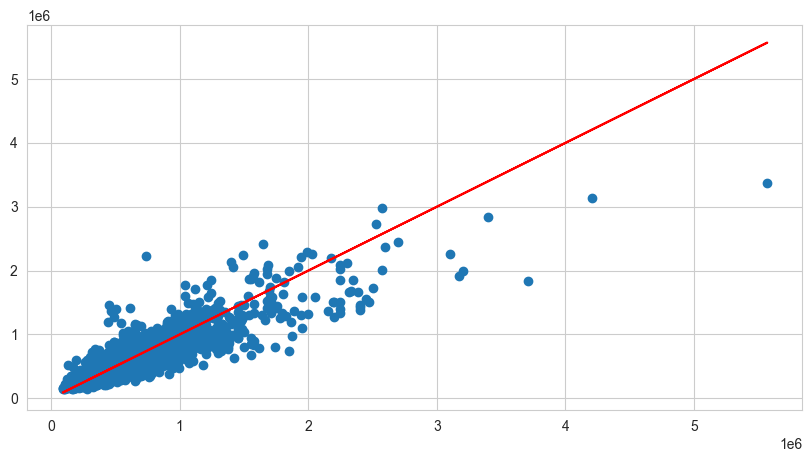

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

# example = [[0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742,0.818182,0.0]]
# print(model.predict(np.array(example)))

y_pred = model.predict(X_valid)

print('MAE:', metrics.mean_absolute_error(y_valid, y_pred))
print('MSE:', metrics.mean_squared_error(y_valid, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_valid, y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_valid, y_pred)
# Perfect predictions
plt.plot(y_valid, y_valid,'r')


<AxesSubplot: >

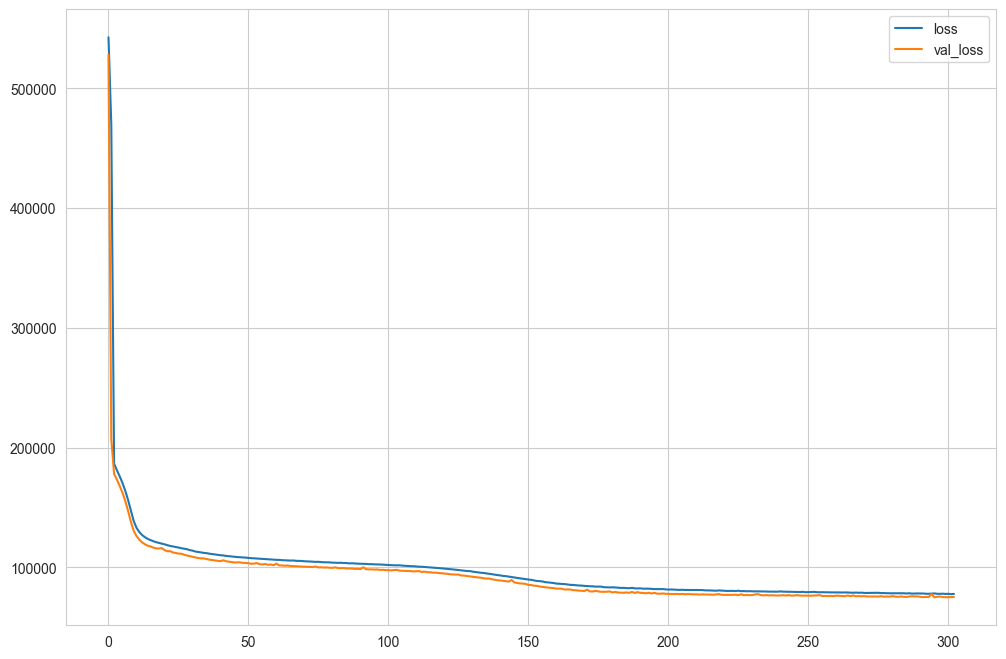

In [52]:
history_df.plot(figsize=(12,8))
